In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from Baysian_Mat import Bayesian_Matte
from PIL import Image, ImageOps
import time  # Execution TIme imports
import psutil

from laplac import Laplacianmatting
from compositing import compositing
from QualityTest import mse2d
from QualityTest import sad2d
from QualityTest import psnr2d
from smooth import smooth

In [148]:
# get current memory usage
Memstart = psutil.Process().memory_info().rss / (1024**2)


# Step 1 : Read image, GT and trimap.
image = np.array(Image.open("C:/Users/aduttagu/Desktop/Bayesian-Matting-Implementation/input_training_lowres/GT01.png"))
image_trimap = np.array(ImageOps.grayscale(Image.open("C:/Users/aduttagu/Desktop/Bayesian-Matting-Implementation/trimap_training_lowres/Trimap1/GT01.png")))
GT = np.array(ImageOps.grayscale(Image.open("C:/Users/aduttagu/Desktop/Bayesian-Matting-Implementation/gt_training_lowres/GT01.png")))

# Start time for computing the execution time
st = time.time()

# Step 2 : Calculating Bayesian Matte for the given trimap
alpha,pixel_count = Bayesian_Matte(image,image_trimap) 

# Step 3 : Making it back to range (0-255) for display purpose
alpha_disp = alpha * 255
alpha_int8 = np.array(alpha,dtype = int)

et = time.time()
elapsed_time = et - st


Successfully Calculated : 1000.0 out of unknown Pixels : 38573.
Successfully Calculated : 2000.0 out of unknown Pixels : 38573.
Successfully Calculated : 3000.0 out of unknown Pixels : 38573.
Successfully Calculated : 4000.0 out of unknown Pixels : 38573.
Successfully Calculated : 5000.0 out of unknown Pixels : 38573.
Successfully Calculated : 6000.0 out of unknown Pixels : 38573.
Successfully Calculated : 7000.0 out of unknown Pixels : 38573.
Successfully Calculated : 8000.0 out of unknown Pixels : 38573.
Successfully Calculated : 9000.0 out of unknown Pixels : 38573.
Successfully Calculated : 10000.0 out of unknown Pixels : 38573.
Successfully Calculated : 11000.0 out of unknown Pixels : 38573.
Successfully Calculated : 12000.0 out of unknown Pixels : 38573.
Successfully Calculated : 13000.0 out of unknown Pixels : 38573.
Successfully Calculated : 14000.0 out of unknown Pixels : 38573.
Successfully Calculated : 15000.0 out of unknown Pixels : 38573.
Successfully Calculated : 16000.0 

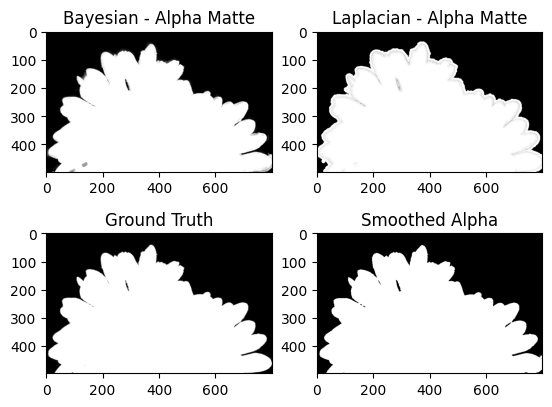

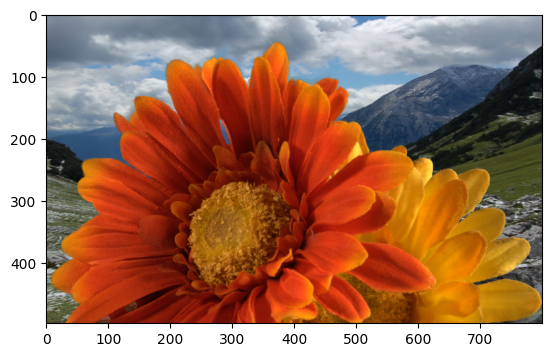

The MSE between the Ground Truth and Bayesian Alpha Matte is : 102.02319076878739
The MSE between the Ground Truth and Laplacian Alpha Matte is : 38149.32382422716
The SAD between the Ground Truth and Bayesian Alpha Matte is : 2182.7267693150075
The SAD between the Ground Truth and Laplacian Alpha Matte is : 235224.95399446573
The PSNR between the Ground Truth and Bayesian Alpha Matte is : 28.077810286838947
The PSNR between the Ground Truth and Laplacian Alpha Matte is : 2.3499308589530052
Execution time for Bayesian Matting: 35.056 seconds
Total memory consumed in execution of this program :  10.359375 MB's


In [149]:
# Step 4 : End to End testing - 1 : Calculating the Laplacian Matting
Lalpha = Laplacianmatting(image, image_trimap)

# Step 5 : Compositing Function Display
background = np.array(Image.open('C:/Users/aduttagu/Desktop/Bayesian-Matting-Implementation/background.png'))
comp_Bay = compositing(image, alpha_disp, background)

# Step 6 : Smoothening ALpha Methods
smooth_alpha = smooth(alpha_disp)

# Step 7 : Displaying THe Bayesian, Laplacian and GT.
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes[0,0].imshow(alpha_disp, cmap='gray')
axes[0,0].set_title('Bayesian - Alpha Matte')
axes[0,1].imshow(Lalpha, cmap='gray')
axes[0,1].set_title('Laplacian - Alpha Matte')
axes[1,0].imshow(GT, cmap='gray')
axes[1,0].set_title('Ground Truth')
axes[1,1].imshow(smooth_alpha, cmap='gray')
axes[1,1].set_title('Smoothed Alpha')
plt.show()



plt.imshow(comp_Bay)
plt.show()


# Part of End to End testing - 1 : Performance Comparision between Laplacian and Bayesian. 
Bay_MSE = mse2d(alpha_disp, GT)
Lap_MSE = mse2d(Lalpha, GT)
print("The MSE between the Ground Truth and Bayesian Alpha Matte is :", Bay_MSE)
print("The MSE between the Ground Truth and Laplacian Alpha Matte is :", Lap_MSE)

Bay_SAD = sad2d(alpha_disp, GT)
Lap_SAD = sad2d(Lalpha, GT)
print("The SAD between the Ground Truth and Bayesian Alpha Matte is :", Bay_SAD)
print("The SAD between the Ground Truth and Laplacian Alpha Matte is :", Lap_SAD)

Bay_PSNR = psnr2d(alpha_disp, GT)
Lap_PSNR = psnr2d(Lalpha, GT)
print("The PSNR between the Ground Truth and Bayesian Alpha Matte is :", Bay_PSNR)
print("The PSNR between the Ground Truth and Laplacian Alpha Matte is :", Lap_PSNR)


print('Execution time for Bayesian Matting: {:.3f} seconds'.format(elapsed_time))

# get usage after completion of code
Memend = psutil.Process().memory_info().rss / (1024**2)
Memuse = Memend - Memstart
print("Total memory consumed in execution of this program : ", Memuse, "MB's")

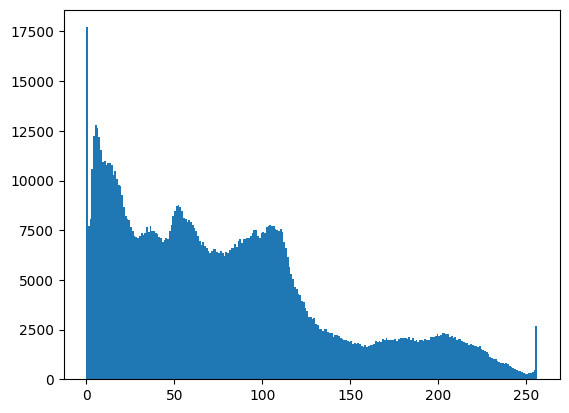

In [164]:
  
# calculate histogram only using Y channel 
hist_in = cv2.calcHist([image],[0],None,[256],[0,256])


plt.hist(image.ravel(), 256, [0,256])
plt.show()


# plt.figure(1)    
# plt.subplot(1, 2, 1)
# plt.plot(hist_in, color='b')
# plt.title('Histogram of input image ')

# plt.figure(1)    
# plt.subplot(1, 2, 2)
# plt.plot(hist_co, color='b')
# plt.title('Histogram of composited Image')
# plt.show()
    

In [166]:
print(image.dtype)
print(comp_Bay.dtype)
Ncomp_Bay = (comp_Bay * 255).astype(np.uint8)

uint8
float64


In [165]:
hist_co = cv2.calcHist([comp_Bay],[0],None,[256],[0,256]) 
plt.hist(comp_Bay.ravel(), 256, [0,256])
plt.show()



error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1008: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'
